In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# load and inspect the dataset
current_dir = os.getcwd()
os.chdir('D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data')
print(current_dir)
input_df = pd.read_csv('ex1data2.txt', sep=',', header=None, names=['Size', 'NoOfBedrooms', 'Price'])
input_df.head()

D:\Anupam_Technical\Coursera\Anupam_ANG_ML\AndrewNG_ML_Exercises\ex1\data


,Size,NoOfBedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
# extract the feature vectors from the dataframe

def extract_features(df):
    X = df.iloc[:, 0:-1].values
    y = df.iloc[:, -1].values.reshape(-1, 1)
    m = len(X)
    return X, y, m

input_features, y, m = extract_features(input_df)

In [6]:
# perform feature normalization

def normalize_features(X):
    for col_num in range(X.shape[1]):
        col_mean = np.mean(X[:, col_num])
        col_std = np.std(X[:, col_num])
        X[:, col_num] = (X[:, col_num] - col_mean) / col_std
    return X

X = normalize_features(input_features.copy())
# add vector of all 1's as the first feature vector
one_vector = np.ones(len(X)).reshape(len(X), 1)
X = np.concatenate((one_vector, X), axis=1)

In [7]:
# the vectorized cost function
def compute_cost(X, theta, y, m):
    J = 0
    J = np.dot(np.transpose((np.dot(X, theta) - y)), (np.dot(X, theta) - y))
    return J[0][0] / (2 * m)


def gradient_descent(X, y, theta, alpha, no_iters, m):
    J_history = np.zeros((no_iters, 1))
    for iteration in range(no_iters):
        J_history[iteration] = compute_cost(X, theta, y, m)
        h = np.dot(X, theta)
        err = h - y
        theta_err = alpha * (np.dot(np.transpose(X), err) / m)
        theta = theta - theta_err
    return theta, J_history

In [8]:
# initialize theta, learning rate alpha and no of iterations
theta = np.zeros((X.shape[1], 1))
alpha = 0.01
num_iters = 400
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters, m)

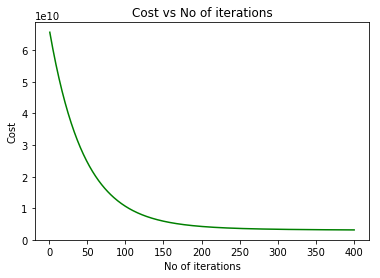

Theta computed from gradient descent: [[316903.67787033]
 [103170.32196862]
 [ 39227.13822499]]


In [9]:
# plot the cost function vs the number of iterations

def plot_cost_vs_iteration(J_history, no_iters):
    iter_arr = np.arange(1, no_iters+1).reshape(no_iters, 1)
    fig, ax_costiter = plt.subplots()
    ax_costiter.plot(iter_arr, J_history, color='green')
    plt.xlabel('No of iterations')
    plt.ylabel('Cost')
    plt.title('Cost vs No of iterations')
    plt.show()
    
plot_cost_vs_iteration(J_history, num_iters)
print("Theta computed from gradient descent: {}".format(theta))    

In [10]:
# make prediction
house = np.array([[1, (1650 - np.mean(input_features[:, 0]))/np.std(input_features[:, 0]),
                       (3 - np.mean(input_features[:, 1]))/np.std(input_features[:, 1])]])
predicted_price = np.dot(house, theta)
print("Predicted price of house of size 1650 sqft with 3 bedrooms is {}$".format(predicted_price[0][0]))

Predicted price of house of size 1650 sqft with 3 bedrooms is 262016.19340647967$
